 <img src="Imagenes/aug_aff.jpg" alt="Imagen creada con inteligencia artificial y editada con Microsoft Paint" style="border-radius: 15px; width: 75%;">

*Imagen creada con inteligencia artificial*


## **INTRODUCCIÓN**

Pese a que en este caso el **desbalanceo** sea mucho menor, la clase con mayor representación es **Neutral** con un **19,59%**, y la que menos es **Asco** con un **9,46%**. Resulta interesante **balancearlas**, dado que buscamos un modelo que funcione lo mejor posible.


## **BIBLIOTECAS USADAS:**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import ast  
from scipy.ndimage import rotate  
import random 
pd.options.mode.chained_assignment = None

## **CARGA DEL DASET**

In [2]:
df_train = pd.read_csv('./datos/AffectNet/df_train_aff.csv')
df_test= pd.read_csv('./datos/AffectNet/df_test_aff.csv')
df_val= pd.read_csv('./datos/AffectNet/df_val_aff.csv')

## **FLIP HORIZONTAL**

>Después del proceso de **data augmentation**, todas las clases tendrán la misma cantidad de **fotografías** (arrays en verdad).    
>Igualaremos el número de fotografías a la clase que más tiene, a esta, de momento, no le haremos nada.    
>Para las demás clases, haremos distintos procesos hasta que todas se igualen.  
>El primer proceso será un "flip horizontal.  


In [3]:
df_train['emotion'].value_counts()

emotion
6    4101
3    4036
5    3232
0    2575
2    2541
4    2473
1    1982
Name: count, dtype: int64

In [4]:
def seleccionar_aleatoriamente(df, emotion, n):
    return df[df['emotion'] == emotion].sample(n=n, random_state=42)
df_emotion_3 = seleccionar_aleatoriamente(df_train, 3, 65)
df_emotion_5 = seleccionar_aleatoriamente(df_train, 5, 869)
df_emotion_0 = seleccionar_aleatoriamente(df_train, 0, 1526)
df_emotion_2 = seleccionar_aleatoriamente(df_train, 2, 1560)
df_emotion_4 = seleccionar_aleatoriamente(df_train, 4, 1628)
df_emotion_1 = df_train[df_train['emotion'] == 1]

df_train_espejo = pd.concat([df_emotion_3, df_emotion_5, df_emotion_0, df_emotion_2, df_emotion_4, df_emotion_1])
df_train_espejo = df_train_espejo.reset_index(drop=True) 

In [5]:
df_train_espejo['emotion'].value_counts()

emotion
1    1982
4    1628
2    1560
0    1526
5     869
3      65
Name: count, dtype: int64

>**Vemos que si sumamos estas (es decir, las lineas que serán volteadas) y los conteos de los datasets de partida, da como resultado que las clases se equilibran (excepto la clase 1,la más desfavorecida)... en otras palabras, vamos bien.**

### **TEST**

In [6]:
df_test['emotion'].value_counts()

emotion
6    512
3    504
5    403
0    321
2    317
4    309
1    247
Name: count, dtype: int64

In [7]:
df_emotion_3_test = seleccionar_aleatoriamente(df_test, 3, 8)
df_emotion_5_test = seleccionar_aleatoriamente(df_test, 5, 109)
df_emotion_0_test = seleccionar_aleatoriamente(df_test, 0, 191)
df_emotion_2_test = seleccionar_aleatoriamente(df_test, 2, 195)
df_emotion_4_test = seleccionar_aleatoriamente(df_test, 4, 203)
df_emotion_1_test = df_test[df_test['emotion'] == 1]
df_test_espejo = pd.concat([ df_emotion_3_test, df_emotion_5_test, df_emotion_0_test, df_emotion_2_test, df_emotion_4_test, df_emotion_1_test])
df_test_espejo = df_test_espejo.reset_index(drop=True) 

In [8]:
df_test_espejo['emotion'].value_counts()

emotion
1    247
4    203
2    195
0    191
5    109
3      8
Name: count, dtype: int64

### **VAL**

In [9]:
df_val['emotion'].value_counts()

emotion
6    513
3    504
5    404
0    322
2    318
4    309
1    248
Name: count, dtype: int64

In [10]:
df_emotion_3_val = seleccionar_aleatoriamente(df_val, 3, 9)
df_emotion_5_val = seleccionar_aleatoriamente(df_val, 5, 109)
df_emotion_0_val = seleccionar_aleatoriamente(df_val, 0, 191)
df_emotion_2_val = seleccionar_aleatoriamente(df_val, 2, 195)
df_emotion_4_val = seleccionar_aleatoriamente(df_val, 4, 204)
df_emotion_1_val = df_val[df_val['emotion'] == 1]
df_val_espejo = pd.concat([ df_emotion_3_val, df_emotion_5_val, df_emotion_0_val, df_emotion_2_val, df_emotion_4_val, df_emotion_1_val])
df_val_espejo = df_val_espejo.reset_index(drop=True)


In [11]:
df_val_espejo['emotion'].value_counts()

emotion
1    248
4    204
2    195
0    191
5    109
3      9
Name: count, dtype: int64

In [12]:
def flip_image_horizontal(pixel_string):
    try:
        pixel_values = list(map(int, pixel_string.split()))
        size = int(np.sqrt(len(pixel_values)))
        image_matrix = np.array(pixel_values).reshape((size, size))
        flipped_image_matrix = np.fliplr(image_matrix)
        flipped_pixel_string = ' '.join(map(str, flipped_image_matrix.flatten()))
        return flipped_pixel_string
    except Exception as e:
        print(f"Error al procesar la imagen: {e}")
        return pixel_string  # Devuelve la cadena original en caso de error


>**Aquí definimos la función que dará la vuelta horizontalmente a las fotografías (realmente se la da a la cadena).**

In [13]:
df_train_espejo.loc[:, 'pixels'] = df_train_espejo['pixels'].apply(lambda x: flip_image_horizontal(x))
df_test_espejo.loc[:, 'pixels'] = df_test_espejo['pixels'].apply(lambda x: flip_image_horizontal(x))
df_val_espejo.loc[:, 'pixels'] = df_val_espejo['pixels'].apply(lambda x: flip_image_horizontal(x))

> **Y con estas llamadas a la función, le damos la vuelta a las líneas que habíamos elegido antes.**

## **VISUALIZACIÓN.**  
> **Visualizaremos las imágenes para verificar si ha ido bien. Primero las visualizaremos sin el flip y luego con el flip. Dado que las imágenes que han sido volteadas en las clases menos desfavorecidas se han elegido aleatoriamente, solo observaremos esto en las clases más desfavorecidas (que se han volteado completamente).**

In [14]:
emotion_labels = {0: 'Enfado', 1: 'Asco', 2: 'Miedo', 3: 'Felicidad', 4: 'Tristeza', 5: 'Sorpresa', 6: 'Neutral'}
def mostrar_imagenes_emocion(df, emotion):
    filtered_df = df[df['emotion'] == emotion].head(6)  # Filtrar las primeras 6 imágenes
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(6, 4))  # Reducir el tamaño de la figura a 6x4 pulgadas
    fig.suptitle(f'Emoción: {emotion_labels[emotion]}', fontsize=14, y=0.94)  # Ajustar la posición y tamaño del subtítulo
    
    axes = axes.flatten()  # Aplanar el array de ejes para iterar fácilmente
    
    for i, ax in enumerate(axes):
        if i < len(filtered_df):
            pixels = np.array(filtered_df.iloc[i]['pixels'].split(), dtype='int').reshape(48, 48)
            ax.imshow(pixels, cmap='gray')
            ax.axis('off')
        else:
            ax.axis('off')

    plt.subplots_adjust(wspace=0.1, hspace=0.05, top=0.85, bottom=0.15, left=0.1, right=0.9)  # Ajustar márgenes y espacio entre subplots
    plt.show()


> **Esta función nos mostrará las imágenes.**

## **SIN VOLTEAR**

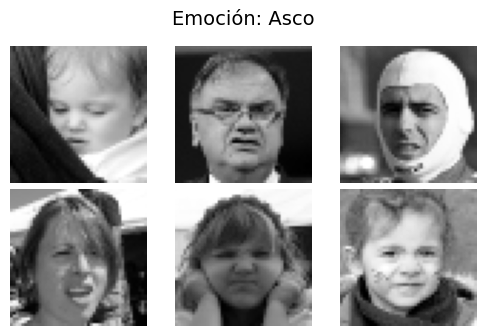

In [15]:
for emotion in [ 1]:
    mostrar_imagenes_emocion(df_train, emotion)

## **VOLTEADAS**

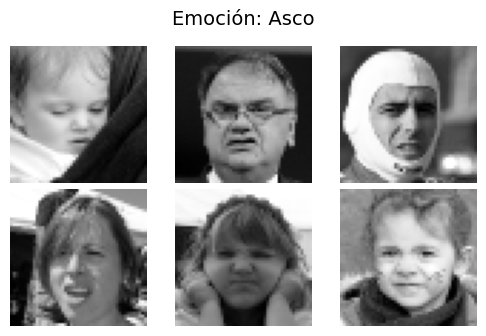

In [16]:
for emotion in [ 1]:
    mostrar_imagenes_emocion(df_train_espejo, emotion)

>Solo una clase se ha tomado **entera**, las demás se han tomado **aleatoriamente**, por lo que sería **difícil** mostrar las mismas. Viendo una sola **expresión** nos basta para ver que efectivamente se han **volteado horizontalmente**.   
>   
> **Hemos comprobado que el volteo ha sido exitoso. Ahora podemos unir los datasets volteados con sus respectivos sin voltear.**


## **UNIÓN DE LOS DATASETS VOLTEADOS CON LOS DATASETS ORIGINALES**

In [17]:
df_train = pd.concat([df_train_espejo, df_train], ignore_index=True)
df_test = pd.concat([df_test_espejo, df_test], ignore_index=True)
df_val = pd.concat([df_val_espejo, df_val], ignore_index=True)  

## **COMPROBAMOS**

In [18]:
print("El dataset de entenamiento ha quedado así:")
print(df_train['emotion'].value_counts())
print()
print("El dataset de validación ha quedado así:")
print(df_val['emotion'].value_counts())
print()
print("El dataset pruebas ha quedado así:")
print(df_test['emotion'].value_counts())

El dataset de entenamiento ha quedado así:
emotion
3    4101
5    4101
0    4101
2    4101
4    4101
6    4101
1    3964
Name: count, dtype: int64

El dataset de validación ha quedado así:
emotion
3    513
5    513
0    513
2    513
4    513
6    513
1    496
Name: count, dtype: int64

El dataset pruebas ha quedado así:
emotion
3    512
5    512
0    512
2    512
4    512
6    512
1    494
Name: count, dtype: int64


>**Se ha quedado prácticamente balanceado, solo queda por balancear la clase 1, asco/Disgust.**  
>  
>"En este punto 'FER2013' aún estaba desbalanceada en la clase 5 (**Sorpresa**)."



In [19]:
df_train['Usage'].value_counts() 

Usage
Training    28570
Name: count, dtype: int64

In [20]:
df_test['Usage'].value_counts()

Usage
PublicTest    3566
Name: count, dtype: int64

In [21]:
df_val['Usage'].value_counts()

Usage
PrivateTest    3574
Name: count, dtype: int64

> **No se han mezclado durante el proceso.**

## **ROTACIONES**  
>**Solo queda balancear la clase 1; con solo rotar parte de las fotografia con un angulo será sufuciciente.**

In [22]:
df_train_rota = seleccionar_aleatoriamente(df_train, 1, 137)
df_train_rota_control = df_train_rota.copy()
df_test_rota = seleccionar_aleatoriamente(df_test, 1, 17) 
df_test_rota_control = df_test_rota.copy()
df_val_rota = seleccionar_aleatoriamente(df_val, 1, 18)
df_val_rota_control = df_val_rota.copy()

>**Aquí se filtran los dataframes para realizar diferentes rotaciones a la etiqueta 1.**

In [23]:
def rotate_image(image_str, angle):
    image = np.array(image_str.split(), dtype=np.uint8)
    image = image.reshape((48, 48))  # Las imágenes con las que trabajamos son de 48x48 píxeles
    rotated_image = rotate(image, angle, reshape=False, mode='nearest')
    rotated_image_str = ' '.join(rotated_image.astype(str).flatten())
    return rotated_image_str

>**Aquí se define la funcion que rotará las imagenes**

In [24]:
df_train_rota.loc[:, 'pixels'] = df_train_rota['pixels'].apply(lambda x: rotate_image(x, 15))  # Más de 15 podra deformar demasiado.
df_test_rota.loc[:, 'pixels'] = df_test_rota['pixels'].apply(lambda x: rotate_image(x, 15))
df_val_rota.loc[:, 'pixels'] = df_val_rota['pixels'].apply(lambda x: rotate_image(x, 15))

>**Aquí se llama a la funcion.**

## **VISUALIZACIÓN**

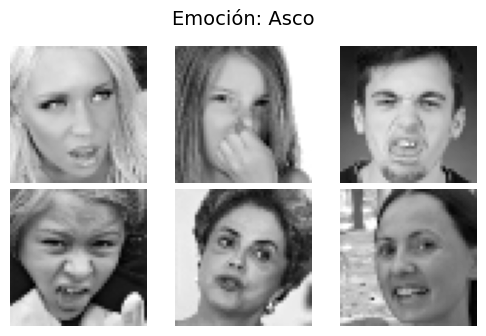

In [25]:
for emotion in [1]:
    mostrar_imagenes_emocion(df_train_rota_control, emotion)

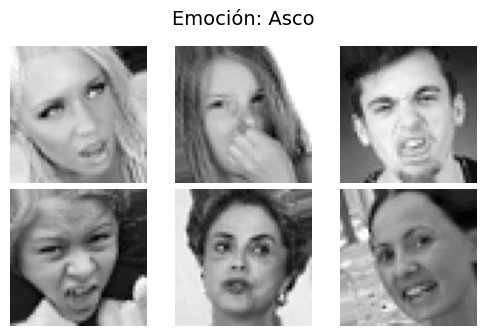

In [26]:
for emotion in [1]:
    mostrar_imagenes_emocion(df_train_rota, emotion)

## **UNIÓN DE LOS DATASETS ROTADOS CON EL RESTO**

In [27]:
df_train = pd.concat([df_train_rota, df_train], ignore_index=True) 
df_test = pd.concat([df_test_rota, df_test], ignore_index=True)
df_val = pd.concat([df_val_rota, df_val], ignore_index=True)

## **COMPROBACIÓN**

In [28]:
print("El dataset de entenamiento ha quedado así:")
print(df_train['emotion'].value_counts())
print()
print("El dataset de validación ha quedado así:")
print(df_val['emotion'].value_counts())
print()
print("El dataset pruebas ha quedado así:")
print(df_test['emotion'].value_counts())

El dataset de entenamiento ha quedado así:
emotion
1    4101
3    4101
5    4101
0    4101
2    4101
4    4101
6    4101
Name: count, dtype: int64

El dataset de validación ha quedado así:
emotion
1    514
3    513
5    513
0    513
2    513
4    513
6    513
Name: count, dtype: int64

El dataset pruebas ha quedado así:
emotion
3    512
5    512
0    512
2    512
4    512
6    512
1    511
Name: count, dtype: int64


## **UNIÓN DE LOS DATASETS DE DISTINTOS USOS Y GUARDADO EN CSV**


In [29]:
df_affe = pd.concat([df_train, df_test, df_val], ignore_index=True) 
df_affe.to_csv('datos/AffectNet/affe_balanceado.csv', index=False)

In [30]:
df_affe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35882 entries, 0 to 35881
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35882 non-null  int64 
 1   pixels   35882 non-null  object
 2   Usage    35882 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.1+ KB


In [31]:
df_affe["Usage"].value_counts(True)

Usage
Training       0.800039
PrivateTest    0.100106
PublicTest     0.099855
Name: proportion, dtype: float64

In [32]:
df_affe["emotion"].value_counts(True)

emotion
1    0.142857
3    0.142857
5    0.142857
0    0.142857
2    0.142857
4    0.142857
6    0.142857
Name: proportion, dtype: float64

## **UNION DE AMBOS DATASETS**  
>**Para hacer menos tedioso el notebook de modelado, se unirán ambos datasets ya balanceados en un único dataset y se hará una (muy) pequeña revisión del mismo.**

In [40]:
df_fer = pd.read_csv("./datos/fer2013/fer2013_blc.csv") 
df_final = pd.concat([df_fer, df_affe], ignore_index=True)

In [41]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98805 entries, 0 to 98804
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  98805 non-null  int64 
 1   pixels   98805 non-null  object
 2   Usage    98805 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.3+ MB


>Vemos que no tenemos nulos, lo cual era de esperar dado que no había nulos en los dataframes que conforman este  
> 
>Tenemos 98805 entradas.

In [42]:
df_final["emotion"].value_counts(True)

emotion
1    0.142857
5    0.142857
6    0.142857
4    0.142857
2    0.142857
0    0.142857
3    0.142857
Name: proportion, dtype: float64

In [43]:
df_final["Usage"].value_counts(True)

Usage
Training       0.801700
PublicTest     0.099671
PrivateTest    0.098629
Name: proportion, dtype: float64

In [48]:
print("Para train:")
training_data = df_final[df_final['Usage'] == 'Training']
training_data['emotion'].value_counts(True)

Para train:


emotion
1    0.142857
5    0.142857
6    0.142857
4    0.142857
2    0.142857
0    0.142857
3    0.142857
Name: proportion, dtype: float64

In [47]:
print("Para test:")
test_data = df_final[df_final['Usage'] == 'PublicTest']
test_data['emotion'].value_counts(True)

Para test:


emotion
5    0.142872
6    0.142872
4    0.142872
2    0.142872
0    0.142872
3    0.142872
1    0.142770
Name: proportion, dtype: float64

In [49]:
print("Para validación:")
test_data = df_final[df_final['Usage'] == 'PrivateTest']
test_data['emotion'].value_counts(True)

Para validación:


emotion
1    0.142945
5    0.142842
6    0.142842
4    0.142842
2    0.142842
0    0.142842
3    0.142842
Name: proportion, dtype: float64

## **GUARDADO DEL DATASET**

In [50]:
df_final.to_csv('datos/df_final.csv', index=False)